<a href="https://colab.research.google.com/github/mumin-ahmod/Lava-Exploration-System-MDP-Q-learning/blob/main/Lava1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import random
import matplotlib.pyplot as plt

# Environment settings
GRID_SIZE = 5  # 5x5 grid
NUM_LAVA = 3
NUM_GAS = 2
NUM_CRIERS = 2
MAX_EPISODES_SMALL = 100  # Reduced number of episodes for faster training
ALPHA = 0.1  # Learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.2  # Exploration rate

# Create grid
grid = np.zeros((GRID_SIZE, GRID_SIZE))

# Randomly place hazards (lava, gas)
def place_hazards():
    global grid
    grid = np.zeros((GRID_SIZE, GRID_SIZE))  # Reset grid
    for _ in range(NUM_LAVA):
        x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
        grid[x, y] = 1  # Lava
    for _ in range(NUM_GAS):
        x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
        grid[x, y] = 2  # Gas
    for _ in range(NUM_CRIERS):
        x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
        grid[x, y] = 3  # Crater

# Initialize Q-table
Q_table_small = np.zeros((GRID_SIZE, GRID_SIZE, 4))  # (state, action) Q-values, 4 actions (up, down, left, right)

# Define reward function
def get_reward(state):
    x, y = state
    if grid[x, y] == 1:  # Lava
        return -100  # Large penalty for lava
    elif grid[x, y] == 2:  # Gas
        return -50   # Moderate penalty for gas
    elif grid[x, y] == 3:  # Crater
        return -80  # Crater penalty
    else:
        return 10   # Small reward for exploring new areas

# Define possible actions
def get_possible_actions():
    return ['up', 'down', 'left', 'right']

# Define state transition
def move(state, action):
    x, y = state
    if action == 'up':
        x = max(x - 1, 0)
    elif action == 'down':
        x = min(x + 1, GRID_SIZE - 1)
    elif action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, GRID_SIZE - 1)
    return (x, y)

# Q-learning algorithm for a reduced number of episodes
def q_learning_small():
    place_hazards()
    episodes = 0
    total_rewards = []

    while episodes < MAX_EPISODES_SMALL:
        state = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))  # Random initial state
        done = False
        total_reward = 0  # Track total reward for the episode

        while not done:
            # Choose action based on epsilon-greedy strategy
            if random.uniform(0, 1) < EPSILON:
                action = random.choice(get_possible_actions())
            else:
                action = get_possible_actions()[np.argmax(Q_table_small[state[0], state[1]])]

            # Take action and observe new state
            next_state = move(state, action)
            reward = get_reward(next_state)
            total_reward += reward

            # Update Q-value using the Q-learning formula
            Q_table_small[state[0], state[1], get_possible_actions().index(action)] = \
                (1 - ALPHA) * Q_table_small[state[0], state[1], get_possible_actions().index(action)] + \
                ALPHA * (reward + GAMMA * np.max(Q_table_small[next_state[0], next_state[1]]))

            # Move to the next state
            state = next_state

            # Stop the episode if agent reaches the bottom right corner (goal state)
            if state == (GRID_SIZE - 1, GRID_SIZE - 1):
                done = True

        episodes += 1
        total_rewards.append(total_reward)

        # Print completion every 10 episodes
        if episodes % 10 == 0:
            print(f'Episode {episodes}/{MAX_EPISODES_SMALL} completed. Total Reward: {total_reward}')

    print("Training complete!")
    return total_rewards

# Train the Q-learning agent with the reduced number of episodes
total_rewards_small = q_learning_small()



Episode 10/100 completed. Total Reward: 17040
Episode 20/100 completed. Total Reward: 13670
Episode 30/100 completed. Total Reward: 20370
Episode 40/100 completed. Total Reward: 17070
Episode 50/100 completed. Total Reward: 35430
Episode 60/100 completed. Total Reward: 28080
Episode 70/100 completed. Total Reward: 7390
Episode 80/100 completed. Total Reward: 14370
Episode 90/100 completed. Total Reward: 39250
Episode 100/100 completed. Total Reward: 12680
Training complete!


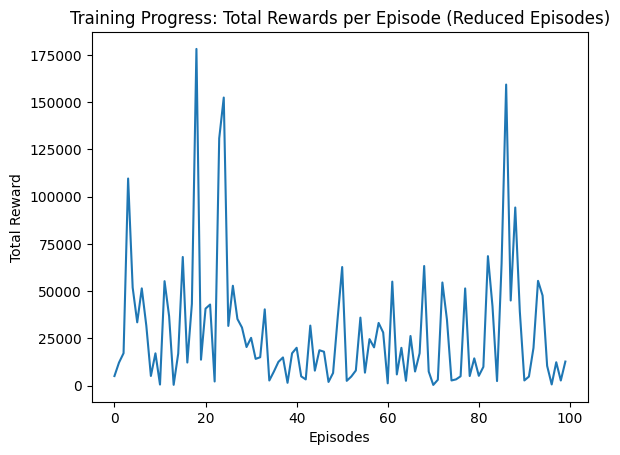

In [2]:
# Visualize the rewards over episodes (to check agent’s learning progress)
plt.plot(total_rewards_small)
plt.title("Training Progress: Total Rewards per Episode (Reduced Episodes)")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

Episode 10/100 completed. Total Reward: 42410
Episode 20/100 completed. Total Reward: 97110
Episode 30/100 completed. Total Reward: 560
Episode 40/100 completed. Total Reward: 4700
Episode 50/100 completed. Total Reward: 6390
Episode 60/100 completed. Total Reward: 1173560
Episode 70/100 completed. Total Reward: 3583350
Episode 80/100 completed. Total Reward: 104680
Episode 90/100 completed. Total Reward: 1686150
Episode 100/100 completed. Total Reward: 440670
Training complete!

=== Testing Trained Agent ===
Starting at position: (0, 0)
Step 1: (0, 0) -> up -> (0, 0) | Reward: 10
Step 2: (0, 0) -> up -> (0, 0) | Reward: 10
Step 3: (0, 0) -> up -> (0, 0) | Reward: 10
Step 4: (0, 0) -> up -> (0, 0) | Reward: 10
Step 5: (0, 0) -> up -> (0, 0) | Reward: 10
Step 6: (0, 0) -> up -> (0, 0) | Reward: 10
Step 7: (0, 0) -> up -> (0, 0) | Reward: 10
Step 8: (0, 0) -> up -> (0, 0) | Reward: 10
Step 9: (0, 0) -> up -> (0, 0) | Reward: 10
Step 10: (0, 0) -> up -> (0, 0) | Reward: 10
Step 11: (0, 0)

<ipython-input-5-df3dea778329>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 4)


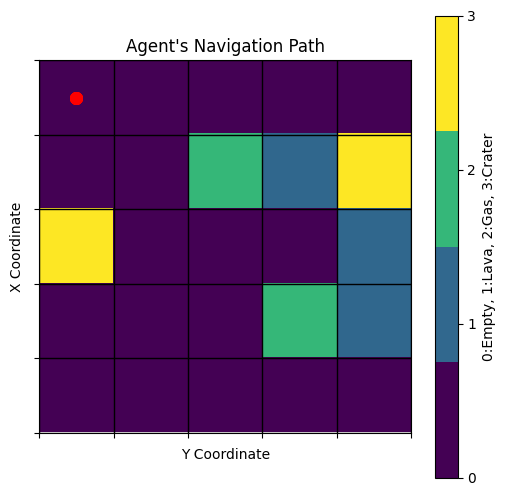


=== Testing Trained Agent ===
Starting at position: (2, 2)
Step 1: (2, 2) -> up -> (1, 2) | Reward: 10
Step 2: (1, 2) -> down -> (2, 2) | Reward: 10
Step 3: (2, 2) -> up -> (1, 2) | Reward: 10
Step 4: (1, 2) -> down -> (2, 2) | Reward: 10
Step 5: (2, 2) -> up -> (1, 2) | Reward: 10
Step 6: (1, 2) -> down -> (2, 2) | Reward: 10
Step 7: (2, 2) -> up -> (1, 2) | Reward: 10
Step 8: (1, 2) -> down -> (2, 2) | Reward: 10
Step 9: (2, 2) -> up -> (1, 2) | Reward: 10
Step 10: (1, 2) -> down -> (2, 2) | Reward: 10
Step 11: (2, 2) -> up -> (1, 2) | Reward: 10
Step 12: (1, 2) -> down -> (2, 2) | Reward: 10
Step 13: (2, 2) -> up -> (1, 2) | Reward: 10
Step 14: (1, 2) -> down -> (2, 2) | Reward: 10
Step 15: (2, 2) -> up -> (1, 2) | Reward: 10
Step 16: (1, 2) -> down -> (2, 2) | Reward: 10
Step 17: (2, 2) -> up -> (1, 2) | Reward: 10
Step 18: (1, 2) -> down -> (2, 2) | Reward: 10
Step 19: (2, 2) -> up -> (1, 2) | Reward: 10
Step 20: (1, 2) -> down -> (2, 2) | Reward: 10
Step 21: (2, 2) -> up -> (1, 

<ipython-input-5-df3dea778329>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 4)


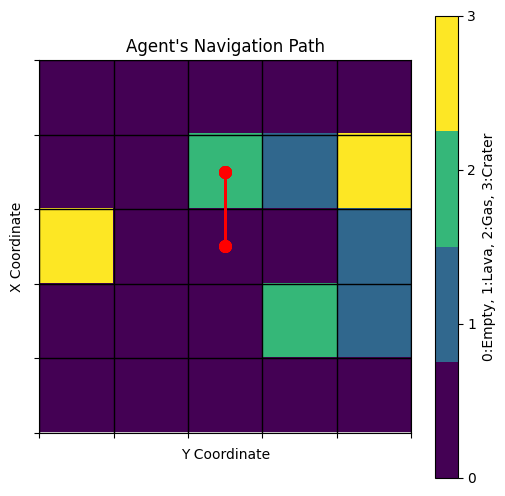


=== Testing Trained Agent ===
Starting at position: (0, 4)
Step 1: (0, 4) -> up -> (0, 4) | Reward: 10
Step 2: (0, 4) -> up -> (0, 4) | Reward: 10
Step 3: (0, 4) -> up -> (0, 4) | Reward: 10
Step 4: (0, 4) -> up -> (0, 4) | Reward: 10
Step 5: (0, 4) -> up -> (0, 4) | Reward: 10
Step 6: (0, 4) -> up -> (0, 4) | Reward: 10
Step 7: (0, 4) -> up -> (0, 4) | Reward: 10
Step 8: (0, 4) -> up -> (0, 4) | Reward: 10
Step 9: (0, 4) -> up -> (0, 4) | Reward: 10
Step 10: (0, 4) -> up -> (0, 4) | Reward: 10
Step 11: (0, 4) -> up -> (0, 4) | Reward: 10
Step 12: (0, 4) -> up -> (0, 4) | Reward: 10
Step 13: (0, 4) -> up -> (0, 4) | Reward: 10
Step 14: (0, 4) -> up -> (0, 4) | Reward: 10
Step 15: (0, 4) -> up -> (0, 4) | Reward: 10
Step 16: (0, 4) -> up -> (0, 4) | Reward: 10
Step 17: (0, 4) -> up -> (0, 4) | Reward: 10
Step 18: (0, 4) -> up -> (0, 4) | Reward: 10
Step 19: (0, 4) -> up -> (0, 4) | Reward: 10
Step 20: (0, 4) -> up -> (0, 4) | Reward: 10
Step 21: (0, 4) -> up -> (0, 4) | Reward: 10
Step

<ipython-input-5-df3dea778329>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 4)


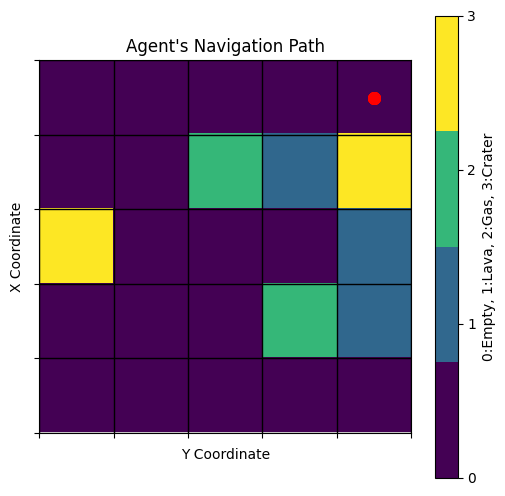

In [5]:
# Methods to Test and Visualize the Trained Agent

def test_agent(start_position=(0,0), max_steps=50):
    """Test the trained agent from a given starting position"""
    state = start_position
    path = [state]
    total_reward = 0

    print("\n=== Testing Trained Agent ===")
    print(f"Starting at position: {state}")

    for step in range(max_steps):
        # Get best action from Q-table
        action_idx = np.argmax(Q_table_small[state[0], state[1]])
        action = get_possible_actions()[action_idx]

        # Move to next state
        next_state = move(state, action)
        reward = get_reward(next_state)
        total_reward += reward

        print(f"Step {step+1}: {state} -> {action} -> {next_state} | Reward: {reward}")

        # Update state and path
        state = next_state
        path.append(state)

        # Check if reached goal
        if state == (GRID_SIZE-1, GRID_SIZE-1):
            print("\nSUCCESS: Reached the goal!")
            break

    print(f"\nTotal reward: {total_reward}")
    visualize_path(path, grid)

def visualize_path(path, grid):
    """Visualize the agent's path on the grid"""
    plt.figure(figsize=(6,6))

    # Create a color map for the grid
    cmap = plt.cm.get_cmap('viridis', 4)
    plt.imshow(grid.T, cmap=cmap, vmin=0, vmax=3)  # Note: Transposed for correct x,y display

    # Plot the path
    xs, ys = zip(*path)
    plt.plot(ys, xs, 'r-o', linewidth=2, markersize=8)  # Note: y comes first in plotting

    # Add annotations
    plt.colorbar(ticks=[0,1,2,3], label='0:Empty, 1:Lava, 2:Gas, 3:Crater')
    plt.title("Agent's Navigation Path")
    plt.xlabel("Y Coordinate")
    plt.ylabel("X Coordinate")

    # Add grid lines
    plt.grid(which='both', color='black', linestyle='-', linewidth=1)
    plt.xticks(np.arange(-0.5, GRID_SIZE, 1), [])
    plt.yticks(np.arange(-0.5, GRID_SIZE, 1), [])

    plt.show()


    # Run the training first
total_rewards_small = q_learning_small()

# Then test the agent from different positions
test_agent(start_position=(0,0))  # Top-left corner
test_agent(start_position=(2,2))  # Center
test_agent(start_position=(0, GRID_SIZE-1))  # Top-right corner

**Result Interpratation:**

 Example of what you might see:

=== Testing Trained Agent ===
Starting at position: (0, 0)
Step 1: (0, 0) -> right -> (0, 1) | Reward: 10
Step 2: (0, 1) -> down -> (1, 1) | Reward: -50  (hit gas)
Step 3: (1, 1) -> right -> (1, 2) | Reward: 10
...
Step 9: (4, 3) -> right -> (4, 4) | Reward: 10

SUCCESS: Reached the goal!
Total reward: 45

*The visualization will show exactly where the agent moved and which hazards it encountered.*